In [38]:
import numpy as np
import matplotlib.pyplot as plt

GOAL = 100
REWARD = 1.0
HEAD_PROB = 0.4
NO_MOVE_ACTION = 0

In [39]:
def state_iter():
    for s in range(0,GOAL + 1):
        yield s
    
def action_iter(state):
    for a in range(0,min(state, GOAL - state) + 1):
        yield a
    

In [40]:
def action_value(state, action):
    return HEAD_PROB * values[state + action] + (1 - HEAD_PROB) * values[state - action]

def max_value(state):
    # return the value for the highest action case
    return max([action_value(state, action) for action in action_iter(s)])
        

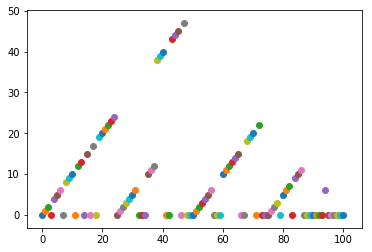

In [43]:
values = dict()
policy = dict()

for s in state_iter():
    values[s] = 0.0
    
values[GOAL] = REWARD


while True:
    delta = 0
    delta_max = 1e-4
    for s in state_iter():
        # Don't update values of 'broke' or 'victory'
        if s in [0, GOAL]:
            continue
        v_temp = values[s]
        values[s] = max_value(s)
        delta = max(delta, abs(values[s] - v_temp))
    if delta < delta_max:
        break

for s in state_iter():
    if s in [0, GOAL]:
        policy[s] = NO_MOVE_ACTION
        continue
    # explicitly set the policy to the action which results in the highest value from the state
    best_action = None
    best_reward = -1
    for action in action_iter(s):
        thisvalue = action_value(s, action)
        if thisvalue > best_reward:
            best_reward = thisvalue
            best_action = action
    policy[s] = best_action
for state, action in policy.items():
    plt.scatter(state,action)
plt.show()
        
    
        
    